# VPoser Decoder
The original body pose space of [SMPL](http://smpl.is.tue.mpg.de/) is not bounded to natural human pose space.
That means you can put a vector value as the pose of a SMPL body model and get a broken body, which might not even look like a human.
To address this issue we replace the original pose space of SMPL with VPoser's latent space (poZ) with known distribution and
correspondence to natural human pose manifold.

The original **body pose** of SMPL is composed of axis-angle representation of 21 joints which in total sums to a vector of 63 elements.
On the other hand, **body poZ**, VPoser's latent space representation for SMPL body, has 32 elements with a Normal distribution.
This means if one samples a 32 dimensional random vector from a Normal distribution and pass it through VPoser's decoder
 pose the result would be a viable human joint configuration in axis-angle representation.
We introduce poZ as a new representation of human body pose that is fully differentiable and can be used in an end-to-end deep learning pipeline.

In this tutorial we will sample a 32 dimensional vector from a Normal distribution
and using the decoder of VPoser create a 63 dimensional vector that can pose the body of a SMPL model.
 
First you need to obtain a trained VPoser and a variation of SMPL model, here we use SMPLx, from https://smpl-x.is.tue.mpg.de/downloads.
Put the obtained VPoser and body models in a folder, here we assume respectively

'GITHUB_CLONE_ROOT/human_body_prior/dowloads/vposer_vXX', and
'GITHUB_CLONE_ROOT/human_body_prior/dowloads/models/smplx/GENDER/model.npz'


In [28]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
%matplotlib inline

from human_body_prior.tools.omni_tools import get_support_data_dir
from os import path as osp
support_dir = get_support_data_dir(__file__)

expr_dir = osp.join(support_dir,'dowloads/V02_05') #'TRAINED_MODEL_DIRECTORY'  in this directory the trained model along with the model code exist
bm_path =  osp.join(support_dir,'dowloads/models/smplx/neutral/model.npz')#'PATH_TO_SMPLX_model.npz'  obtain from https://smpl-x.is.tue.mpg.de/downloads

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
#Loading SMPLx Body Model
from human_body_prior.body_model.body_model import BodyModel

bm = BodyModel(bm_path=bm_path).to('cuda')

In [30]:
#Loading VPoser Body Pose Prior
from human_body_prior.tools.model_loader import load_model
from human_body_prior.models.vposer_model import VPoser
vp, ps = load_model(expr_dir, model_code=VPoser,
                              remove_words_in_model_weights='vp_model.',
                              disable_grad=True)
vp = vp.to('cuda')

Found Trained Model: ../dowloads/vposer_v1_0/snapshots/TR00_E096.pt


In [31]:
import torch
import numpy as np

from body_visualizer.tools.visualization_tools import render_smpl_params
from body_visualizer.tools.visualization_tools import imagearray2file
from notebook_tools import show_image

poZ_body_sample.shape torch.Size([1, 32])
pose_body.shape torch.Size([1, 63])


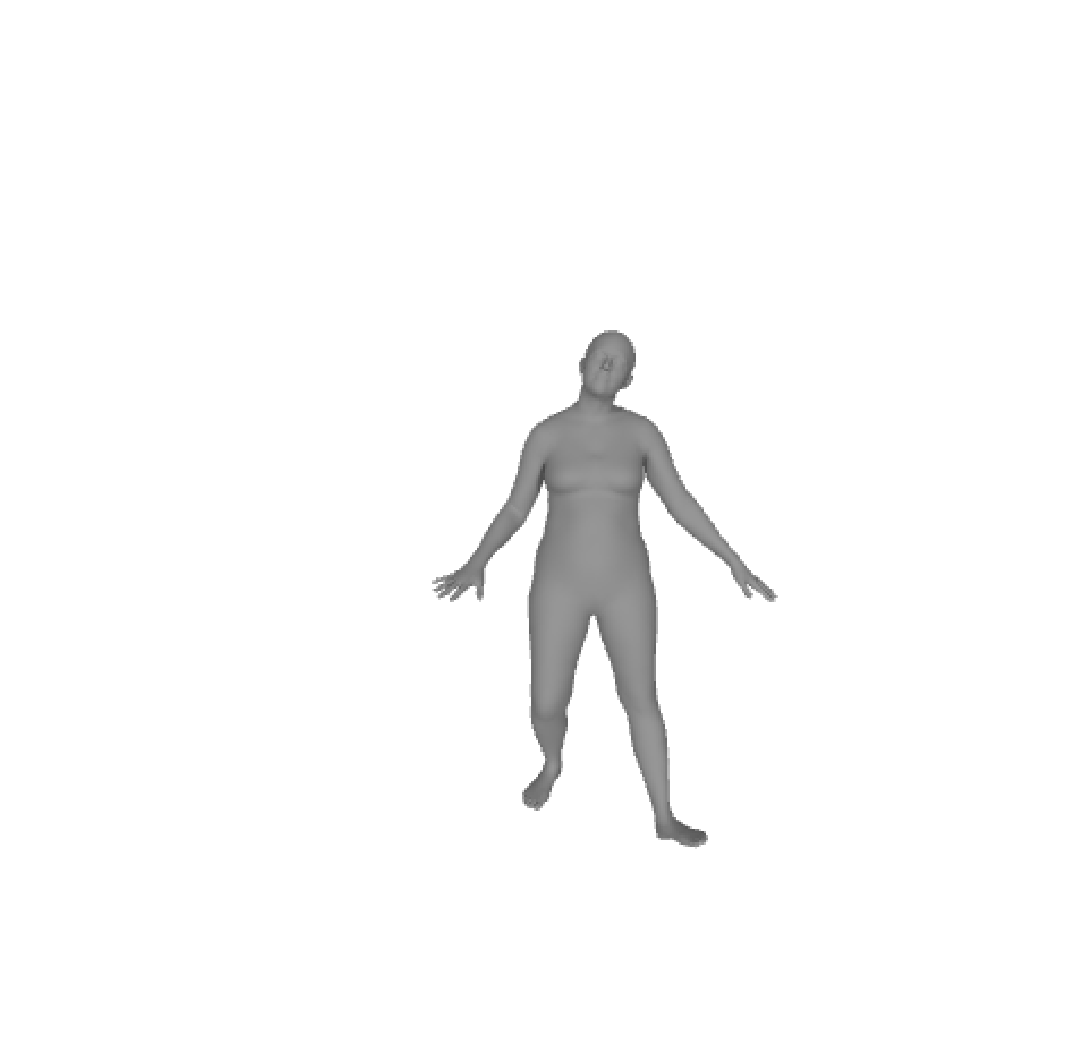

In [36]:
#Sample a 32 dimentional vector from a Normal distribution
poZ_body_sample = torch.from_numpy(np.random.randn(1,32).astype(np.float32)).to('cuda')
pose_body = vp.decode(poZ_body_sample).view(-1, 63)

print('poZ_body_sample.shape', poZ_body_sample.shape)
print('pose_body.shape', pose_body.shape)

# images = render_smpl_params(bm, pose_body).reshape(1,1,1,400,400,3)
# img = imagearray2file(images)
# show_image(np.array(img)[0])

Above we drawn a sample from a 32 dimentional Normal distribution and decoded its value to a full 63 dimentional SMPL body pose vector. The generated image shows the corresponding rendered body.